In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score,classification_report


pd.set_option('display.max_columns', None)

import tensorflow  as tf
from tensorflow import keras
from tensorflow.keras import layers


In [2]:
train  = pd.read_csv("titanic/train.csv")
test  = pd.read_csv("titanic/test.csv")
gender_submission  = pd.read_csv("titanic/gender_submission.csv")

In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
gender_submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [6]:
df = train.copy()

In [7]:
#df.drop('index',axis=1, inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Filling Nan Values:

In [9]:
df['Age'].median()

28.0

In [10]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

In [11]:
df['Embarked'].mode()

0    S
dtype: object

In [12]:
df['Embarked'].isna()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Embarked, Length: 891, dtype: bool

In [13]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Scaling:

In [14]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [15]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

df[['Age','Fare']] = sc.fit_transform(df[['Age','Fare']])

In [16]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,-0.565736,1,0,A/5 21171,-0.502445,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.663861,1,0,PC 17599,0.786845,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,-0.258337,0,0,STON/O2. 3101282,-0.488854,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.433312,1,0,113803,0.420730,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,0.433312,0,0,373450,-0.486337,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,-0.181487,0,0,211536,-0.386671,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,-0.796286,0,0,112053,-0.044381,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,-0.104637,1,2,W./C. 6607,-0.176263,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,-0.258337,0,0,111369,-0.044381,C148,C


In [17]:
df2 = df[['Age','Fare','Pclass','Sex','Embarked','Survived']]
df2

,Age,Fare,Pclass,Sex,Embarked,Survived
0,-0.565736,-0.502445,3,male,S,0
1,0.663861,0.786845,1,female,C,1
2,-0.258337,-0.488854,3,female,S,1
3,0.433312,0.420730,1,female,S,1
4,0.433312,-0.486337,3,male,S,0
...,...,...,...,...,...,...
886,-0.181487,-0.386671,2,male,S,0
887,-0.796286,-0.044381,1,female,S,1
888,-0.104637,-0.176263,3,female,S,0
889,-0.258337,-0.044381,1,male,C,1


In [18]:
df2 = pd.concat([df2,pd.get_dummies(df2['Pclass'],prefix='Pclass')],axis=1)
df2 = pd.concat([df2,pd.get_dummies(df2['Embarked'],prefix='Embarked')],axis=1)
df2 = pd.concat([df2,pd.get_dummies(df2['Sex'],prefix='Sex')],axis=1)

df2

,Age,Fare,Pclass,Sex,Embarked,Survived,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,-0.565736,-0.502445,3,male,S,0,0,0,1,0,0,1,0,1
1,0.663861,0.786845,1,female,C,1,1,0,0,1,0,0,1,0
2,-0.258337,-0.488854,3,female,S,1,0,0,1,0,0,1,1,0
3,0.433312,0.420730,1,female,S,1,1,0,0,0,0,1,1,0
4,0.433312,-0.486337,3,male,S,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.181487,-0.386671,2,male,S,0,0,1,0,0,0,1,0,1
887,-0.796286,-0.044381,1,female,S,1,1,0,0,0,0,1,1,0
888,-0.104637,-0.176263,3,female,S,0,0,0,1,0,0,1,1,0
889,-0.258337,-0.044381,1,male,C,1,1,0,0,1,0,0,0,1


In [19]:
df2.drop(['Pclass','Embarked','Sex'], axis=1, inplace=True)

# check for multicollinearity

<AxesSubplot:>

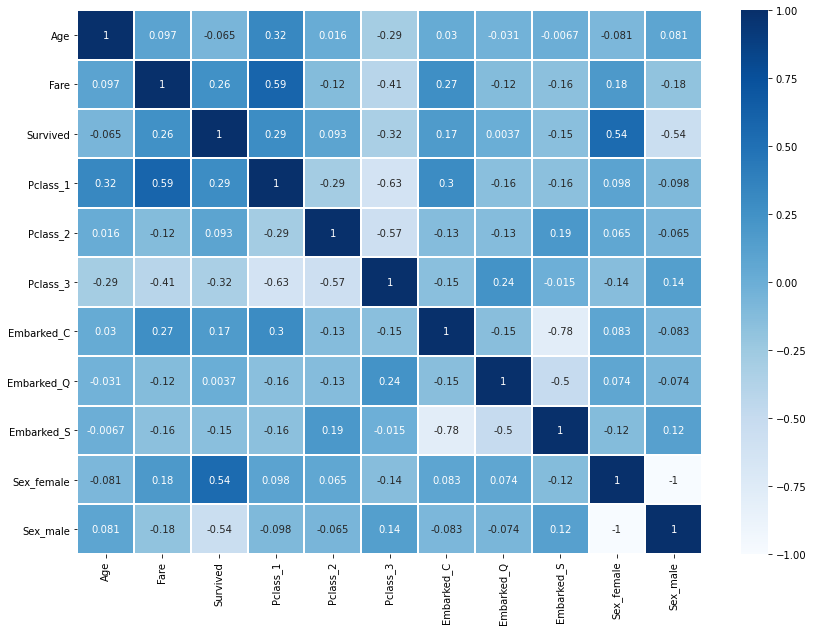

In [20]:
colormap = plt.cm.Blues

plt.figure(figsize=(14,10))
sns.heatmap(df2.corr(),cmap = colormap,annot=True,linewidths=1)

In [21]:
# we also check for Variance Inflation Factors
# a vif >=5 means the feautre is highly correlaed with others
# here we see vif values of inf for all feautres
import statsmodels.api as sm

data =df2.drop(['Survived'],axis=1)

vif_df_clean = pd.DataFrame(columns = ['Var', 'Vif'])
x_var_names = data.columns
for i in range(0, x_var_names.shape[0]):
    y = data[x_var_names[i]]
    x = data[x_var_names.drop([x_var_names[i]])]
    r_squared = sm.OLS(y.astype(float),x.astype(float)).fit().rsquared
    vif = round(1/(1-r_squared),2)
    vif_df_clean.loc[i] = [x_var_names[i], vif]

vif_df_clean.sort_values(by = 'Vif', axis = 0, ascending=False, inplace=False)

C:\Users\Josh\anaconda3\envs\SignLangauge\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  


,Var,Vif
2,Pclass_1,inf
3,Pclass_2,inf
4,Pclass_3,inf
5,Embarked_C,inf
6,Embarked_Q,inf
7,Embarked_S,inf
8,Sex_female,inf
9,Sex_male,inf
1,Fare,1.62
0,Age,1.18


In [22]:
df2.drop(['Pclass_3','Embarked_S','Sex_male'], axis=1, inplace=True)

In [23]:
X = df2.drop("Survived",axis=1)
y= df2['Survived']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)



# X_train = df2.drop("Survived",axis=1)
# y_train = df2['Survived']
# X_test = test.copy()

# The NN way:

In [24]:
xtrain = X_train.values
ytrain = y_train.values
xtest = X_test.values
ytest = y_test.values

xtrain = np.asarray(xtrain).astype(np.float32)
xtest = np.asarray(xtest).astype(np.float32)
ytrain = np.asarray(ytrain).astype(np.float32)
ytest = np.asarray(ytest).astype(np.float32)

In [25]:
df2.shape, xtrain.shape

((891, 8), (712, 7))

In [26]:
model = keras.Sequential() 

model.add(layers.Dense(64,activation='relu',input_shape=[7]))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputlayer (InputLayer)      [(None, 7)]               0         
_________________________________________________________________
dense (Dense)                (None, 64)                512       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 3,137
Trainable params: 3,137
Non-trainable params: 0
_________________________________________________________________


In [27]:
no_epochs = 120
batch_size = 64

model.fit(
        xtrain, ytrain,
        epochs =no_epochs,
        batch_size=batch_size,
        validation_data=(xtest, ytest),
        verbose = 1,
)

Epoch 1/120
12/12 [==============================] - 0s 27ms/step - loss: 0.6800 - accuracy: 0.5365 - val_loss: 0.6452 - val_accuracy: 0.8101
Epoch 2/120
12/12 [==============================] - 0s 4ms/step - loss: 0.6400 - accuracy: 0.7626 - val_loss: 0.5980 - val_accuracy: 0.8268
Epoch 3/120
12/12 [==============================] - 0s 4ms/step - loss: 0.6062 - accuracy: 0.7654 - val_loss: 0.5497 - val_accuracy: 0.8212
Epoch 4/120
12/12 [==============================] - 0s 4ms/step - loss: 0.5727 - accuracy: 0.7654 - val_loss: 0.5037 - val_accuracy: 0.8212
Epoch 5/120
12/12 [==============================] - 0s 4ms/step - loss: 0.5382 - accuracy: 0.7669 - val_loss: 0.4621 - val_accuracy: 0.8212
Epoch 6/120
12/12 [==============================] - 0s 4ms/step - loss: 0.5092 - accuracy: 0.7739 - val_loss: 0.4293 - val_accuracy: 0.8212
Epoch 7/120
12/12 [==============================] - 0s 4ms/step - loss: 0.4912 - accuracy: 0.7697 - val_loss: 0.4074 - val_accuracy: 0.8268
Epoch 8/120


Epoch 59/120
12/12 [==============================] - 0s 4ms/step - loss: 0.3863 - accuracy: 0.8413 - val_loss: 0.3878 - val_accuracy: 0.8045
Epoch 60/120
12/12 [==============================] - 0s 3ms/step - loss: 0.3912 - accuracy: 0.8287 - val_loss: 0.3843 - val_accuracy: 0.8101
Epoch 61/120
12/12 [==============================] - 0s 4ms/step - loss: 0.3859 - accuracy: 0.8385 - val_loss: 0.3893 - val_accuracy: 0.8268
Epoch 62/120
12/12 [==============================] - 0s 3ms/step - loss: 0.3839 - accuracy: 0.8357 - val_loss: 0.3895 - val_accuracy: 0.8212
Epoch 63/120
12/12 [==============================] - 0s 4ms/step - loss: 0.3816 - accuracy: 0.8441 - val_loss: 0.3893 - val_accuracy: 0.8212
Epoch 64/120
12/12 [==============================] - 0s 3ms/step - loss: 0.3826 - accuracy: 0.8441 - val_loss: 0.3982 - val_accuracy: 0.8380
Epoch 65/120
12/12 [==============================] - 0s 4ms/step - loss: 0.3829 - accuracy: 0.8357 - val_loss: 0.3975 - val_accuracy: 0.8212
Epoch 

In [28]:
pred_dl = model.predict(xtest)

In [29]:
pred_dl2 = [1 if x >= 0.5 else 0 for x in pred_dl]
pred_dl2

[0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0]

In [30]:
accuracy_score(y_test, pred_dl2)

0.8100558659217877

# accuracy after submitting on kaggle: 0.78 %

## tuning the neural network : https://colab.research.google.com/drive/1eNS1yLxKaOjLM954MpfNJNgI7TprfuTi